In [1]:
from pokerl.agent.DQN.DQN import DQNAgent
from pokerl.env.pokemonblue import PokemonBlueEnv
from pokerl.env.rewards.basic_rewards import LevelPokemon

In [4]:
env = PokemonBlueEnv()
agent = DQNAgent(env, EPSILON=.5)

state = env.reset()

  0%|          | 0/10 [00:00<?, ?it/s]

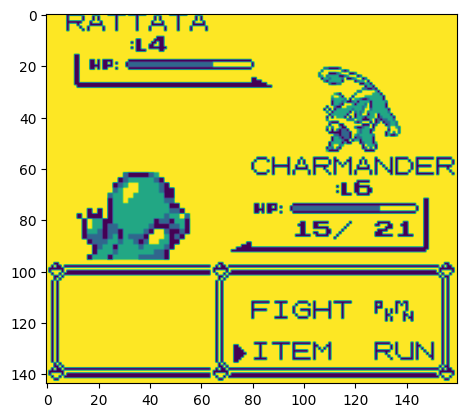

  0%|          | 0/10 [00:47<?, ?it/s]


AttributeError: 'PokemonBlueEnv' object has no attribute 'pokemon_level'

In [7]:
from tqdm import tqdm 
from matplotlib import pyplot as plt


for epoch in tqdm(range(10)):
    agent.EPSILON = 1 - epoch/10
    agent.memory.clear()
    for _ in range(5000):
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.update(state, action, reward, next_state, done)
        if done:
            break
    agent.train()
    plt.imshow(env.render())
    plt.show()
    env.reset()